
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('titanic_filtered_LM.csv')

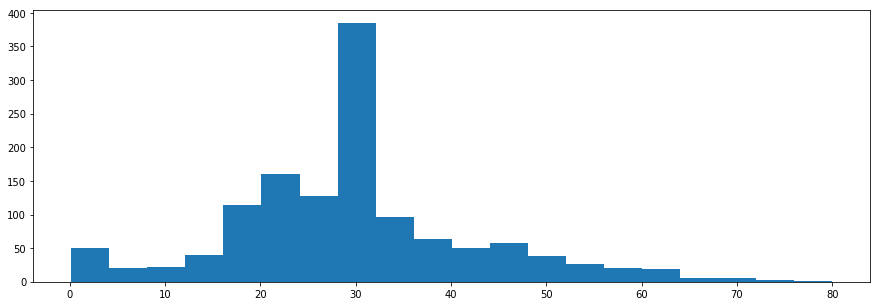

In [11]:
# plot histogram of ages of people

[]

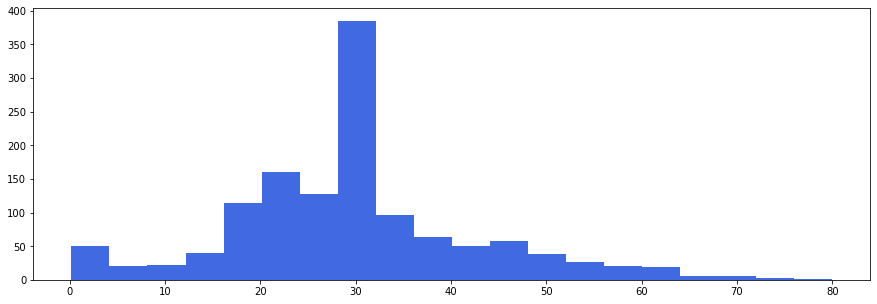

In [248]:
plt.subplots(figsize=(15,5))
plt.hist(df.age, bins = 20, color = 'royalblue')
plt.plot()

[321 277 709]
Int64Index([1, 2, 3], dtype='int64', name='pclass')


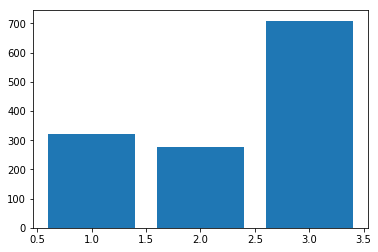

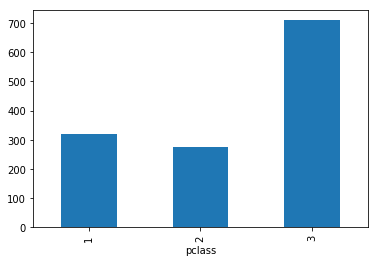

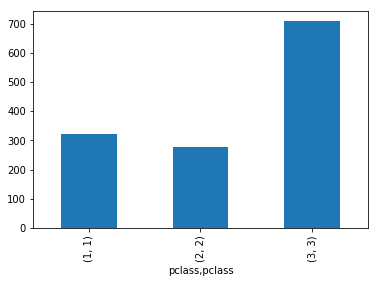

[]

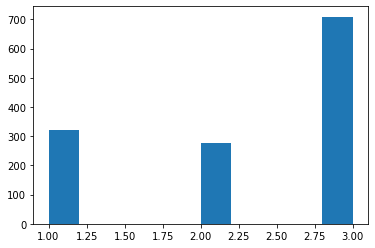

In [266]:
# plot no of people in each pclass on bar chart
plt.hist(df.pclass)
plt.plot()

In [160]:
df['pclass'] # above histogram is a representation of these value's distribution.

0       1
1       1
2       1
3       1
4       1
       ..
1302    3
1303    3
1304    3
1305    3
1306    3
Name: pclass, Length: 1307, dtype: int64

In [43]:
df.pclass.value_counts().sort_index()

1    321
2    277
3    709
Name: pclass, dtype: int64

Text(0.5, 0, 'pclass')

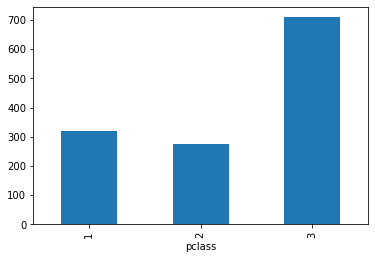

In [45]:
df.pclass.value_counts().sort_index().plot(kind='bar')
plt.xlabel('pclass')

<BarContainer object of 2 artists>

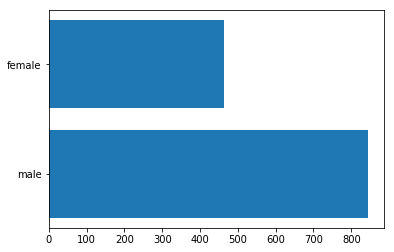

In [26]:
# plot a bar-chart depicting the ratio of males to females

In [280]:
df.gender

0       female
1         male
2       female
3         male
4       female
         ...  
1302    female
1303    female
1304      male
1305      male
1306      male
Name: gender, Length: 1307, dtype: object

In [268]:
df.gender.value_counts()

male      843
female    464
Name: gender, dtype: int64

In [110]:
print(df.gender.value_counts().index)

Index(['male', 'female'], dtype='object')


In [102]:
df.gender.value_counts().values

array([843, 464], dtype=int64)

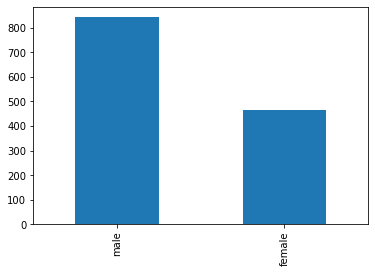

In [285]:
df.gender.value_counts().plot(kind='bar')

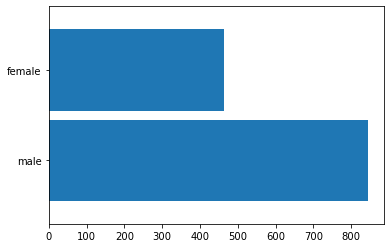

In [288]:
df.gender.value_counts().plot(kind='barh', width = 0.9)

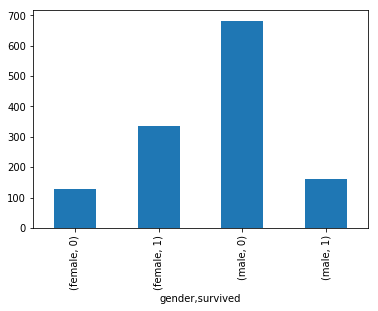

('female', 0)
('female', 1)
('male', 0)
('male', 1)


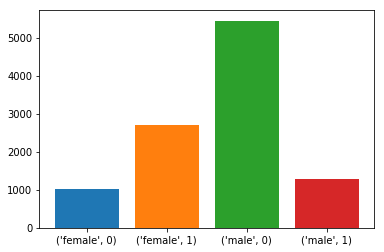

In [53]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.

In [278]:
print(df.groupby(by=['gender','survived']).size())

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64


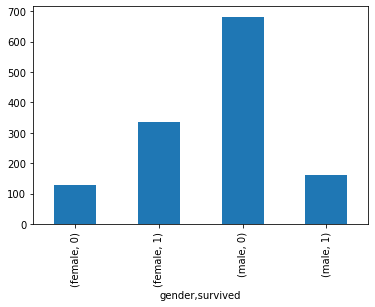

In [148]:
df.groupby(by=['gender','survived']).size().plot(kind='bar')

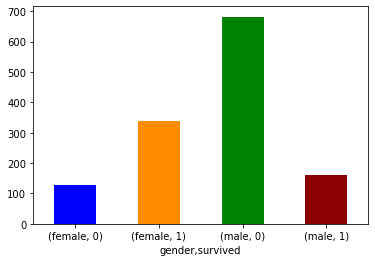

In [293]:
df.groupby(by=['gender','survived']).size().plot(kind='bar', color=['blue','darkorange','green','darkred'], figsize=(6,4), rot=0)
# rot : rotation for ticks

In [118]:
print(df.groupby(by=['gender','survived']).size().values)

[127 337 682 161]


In [109]:
print(df.groupby(by=['gender','survived']).size().index)

MultiIndex([('female', 0),
            ('female', 1),
            (  'male', 0),
            (  'male', 1)],
           names=['gender', 'survived'])


In [279]:
df.groupby(by=['gender','survived']).size()

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64

In [120]:
df.groupby(by=['gender','survived']).size().unstack(level=1) # by default, level=1

survived,0,1
gender,,
female,127,337
male,682,161


In [115]:
df.groupby(by=['gender','survived']).size().unstack(level=0)

gender,female,male
survived,,
0,127,682
1,337,161


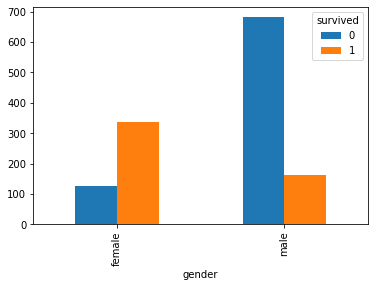

In [281]:
# df.groupby(by=['gender','survived']).size().unstack(level=1).plot(kind='bar')

In [122]:
print(df.groupby(by=['gender','survived']).size().reset_index())

   gender  survived    0
0  female         0  127
1  female         1  337
2    male         0  682
3    male         1  161


In [130]:
df.groupby(by=['gender','survived']).size().reset_index()[['gender','survived']]

,gender,survived
0,female,0
1,female,1
2,male,0
3,male,1


In [135]:
print(df.groupby(by=['gender','survived']).size().reset_index().columns[2])

0


In [139]:
print(df.groupby(by=['gender','survived']).size().reset_index()[[0]])

     0
0  127
1  337
2  682
3  161


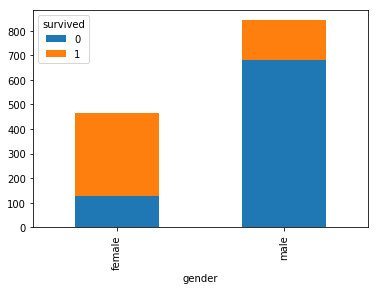

male      682
female    127
Name: gender, dtype: int64


<BarContainer object of 2 artists>

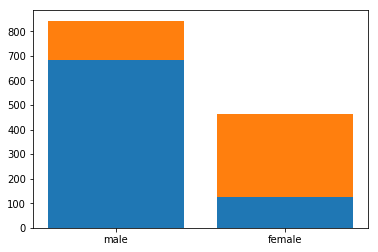

In [90]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.

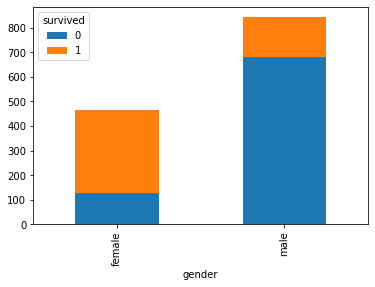

In [166]:
df.groupby(by=['gender','survived']).size().unstack(level=1).plot(kind='bar', stacked = True)

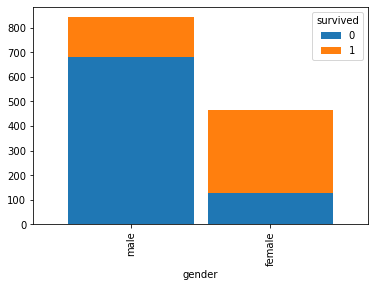

In [181]:
df.groupby(by=['gender','survived']).size().unstack(level=1).sort_index(ascending=False).plot(kind='bar', stacked = True, width=.9)

In [170]:
df.groupby(by=['gender','survived']).size().unstack(level=1).values

array([[127, 337],
       [682, 161]], dtype=int64)

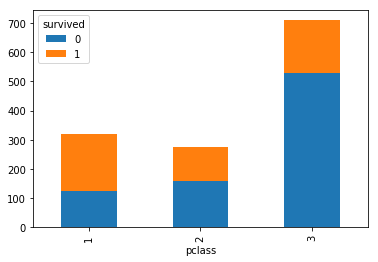

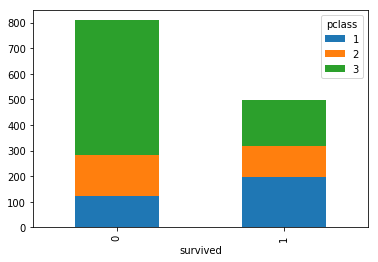

In [95]:
# plot stacked bar of survived with different pclass in same bar

In [282]:
df.groupby(by=['pclass','survived']).size()

pclass  survived
1       0           123
        1           198
2       0           158
        1           119
3       0           528
        1           181
dtype: int64

In [283]:
df.groupby(by=['pclass','survived']).size().unstack(level=1)

survived,0,1
pclass,,
1,123,198
2,158,119
3,528,181


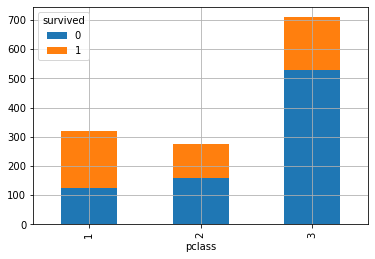

In [290]:
df.groupby(by=['pclass','survived']).size().unstack(level=1).plot(kind='bar', stacked = True, grid=True)

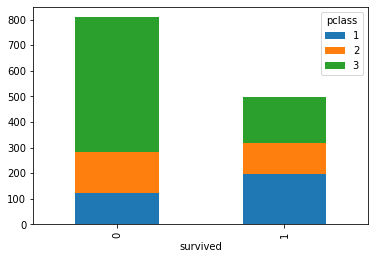

In [289]:
df.groupby(by=['pclass','survived']).size().unstack(level=0).plot(kind='bar', stacked = True)

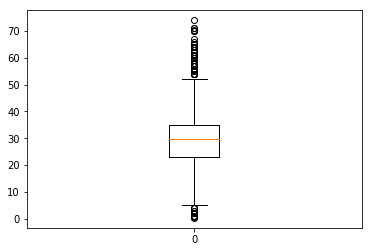

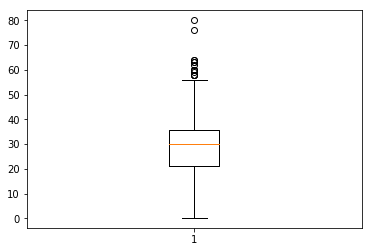

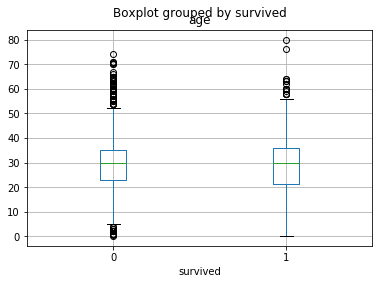

In [122]:
# plot box plot of ages of survived vs not-survived

{'whiskers': [<matplotlib.lines.Line2D at 0x27c3604ee48>,
 'caps': [<matplotlib.lines.Line2D at 0x27c36053b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c36038f48>],
 'medians': [<matplotlib.lines.Line2D at 0x27c36059ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c3605f588>],
 'means': []}

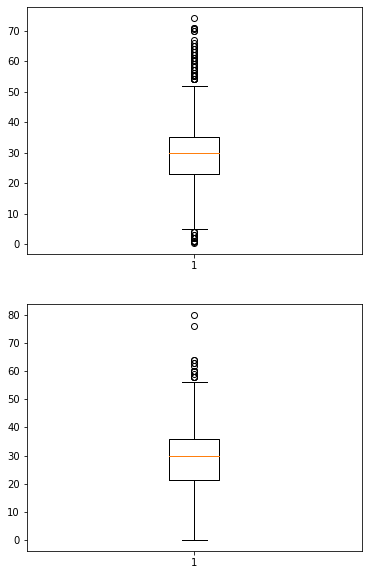

In [236]:
fig, ax=plt.subplots(2,1, figsize=(6,10))
ax[0].boxplot(df[df['survived']==0]['age'])
ax[1].boxplot(df[df['survived']==1]['age'])

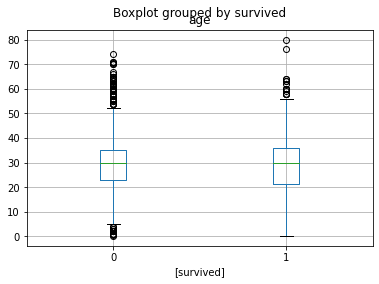

In [294]:
df.boxplot(['age'], by=['survived'])

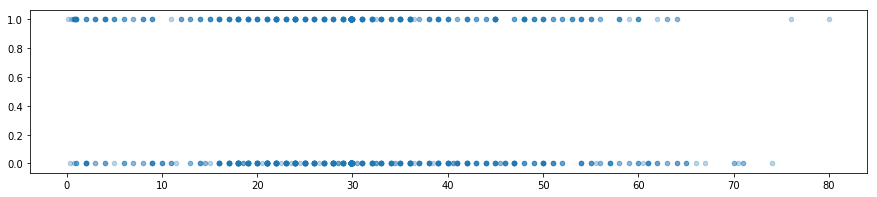

In [134]:
# plot scatter plot of ages vs survived.

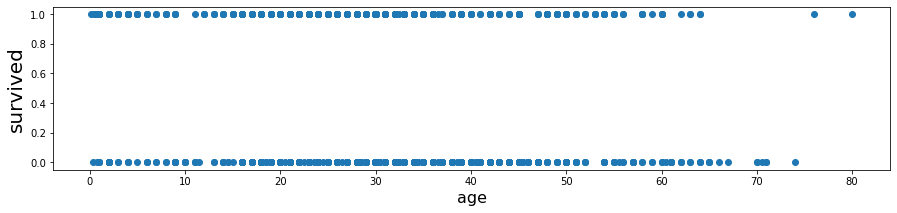

In [305]:
plt.subplots(figsize=(15,3))
plt.xlabel("age", fontdict={'size':16})
plt.ylabel("survived", fontdict={'size':20})
plt.scatter(df.age,df.survived)